# Introduction
- KaggleのNMRコンペ(https://www.kaggle.com/c/champs-scalar-coupling/data)
- このノートブックでは、`dipole_moments`のEDAを行う

# Let's import everything I nead :)

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


# Data Preparation

**check datasets**

In [2]:
dir_data = './data/champs-scalar-coupling/'
path_list = glob.glob(dir_data + '*')
path_list

['./data/champs-scalar-coupling/magnetic_shielding_tensors.csv',
 './data/champs-scalar-coupling/structures.csv',
 './data/champs-scalar-coupling/mulliken_charges.csv',
 './data/champs-scalar-coupling/scalar_coupling_contributions.csv',
 './data/champs-scalar-coupling/train.csv',
 './data/champs-scalar-coupling/structures',
 './data/champs-scalar-coupling/test.csv',
 './data/champs-scalar-coupling/sample_submission.csv',
 './data/champs-scalar-coupling/dipole_moments.csv',
 './data/champs-scalar-coupling/potential_energy.csv']

**load csv**

In [3]:
path = './data/champs-scalar-coupling/dipole_moments.csv'
df = pd.read_csv(path)

# Pnadas Profiling

In [5]:
pdp.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


Number of variables,4
Number of observations,85003
Total Missing (%),0.0%
Total size in memory,2.6 MiB
Average record size in memory,32.0 B
Numeric,3
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,0


# EDA: dipole_moments.csv
- null なし

---

## Basics

In [5]:
df.head(5)

,molecule_name,X,Y,Z
0,dsgdb9nsd_000001,0.0000,0.0,0.0000
1,dsgdb9nsd_000002,-0.0002,0.0,1.6256
2,dsgdb9nsd_000003,0.0000,0.0,-1.8511
3,dsgdb9nsd_000005,0.0000,0.0,-2.8937
4,dsgdb9nsd_000007,0.0000,0.0,0.0000


In [6]:
df.tail(5)

,molecule_name,X,Y,Z
84998,dsgdb9nsd_133879,0.4372,-0.0088,1.3855
84999,dsgdb9nsd_133880,0.1310,-1.3712,-0.0000
85000,dsgdb9nsd_133881,1.2590,0.1153,-1.0814
85001,dsgdb9nsd_133882,-0.3710,-1.2435,0.0000
85002,dsgdb9nsd_133884,1.3623,1.4058,-0.0000


---> molecule_name はカブりはなさそう。ところどころない数字がある(000004とか)。

In [7]:
df.count()

molecule_name    85003
X                85003
Y                85003
Z                85003
dtype: int64

In [8]:
df.isnull().sum(axis=0)

molecule_name    0
X                0
Y                0
Z                0
dtype: int64

## Plot

**X, Y, Z**

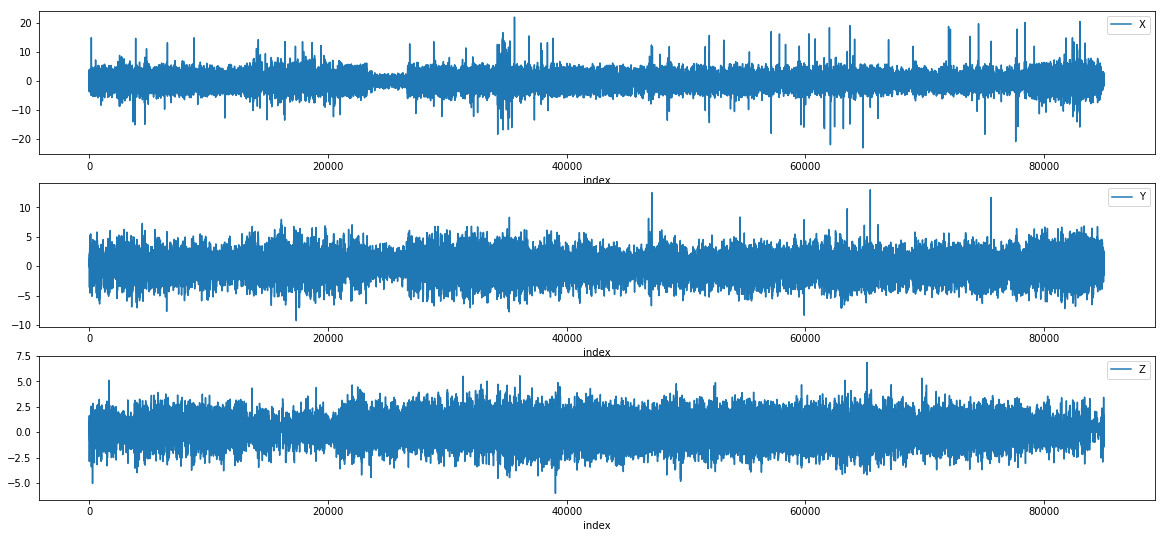

In [36]:
axis = ['X', 'Y', 'Z']
fig, axs = plt.subplots(3,1, figsize=(20, 9))
axs = axs.ravel()
for i in range(3):
    axs[i].plot(df[axis[i]], label=axis[i])
    axs[i].set_xlabel('index')
    axs[i].legend()

**extend**

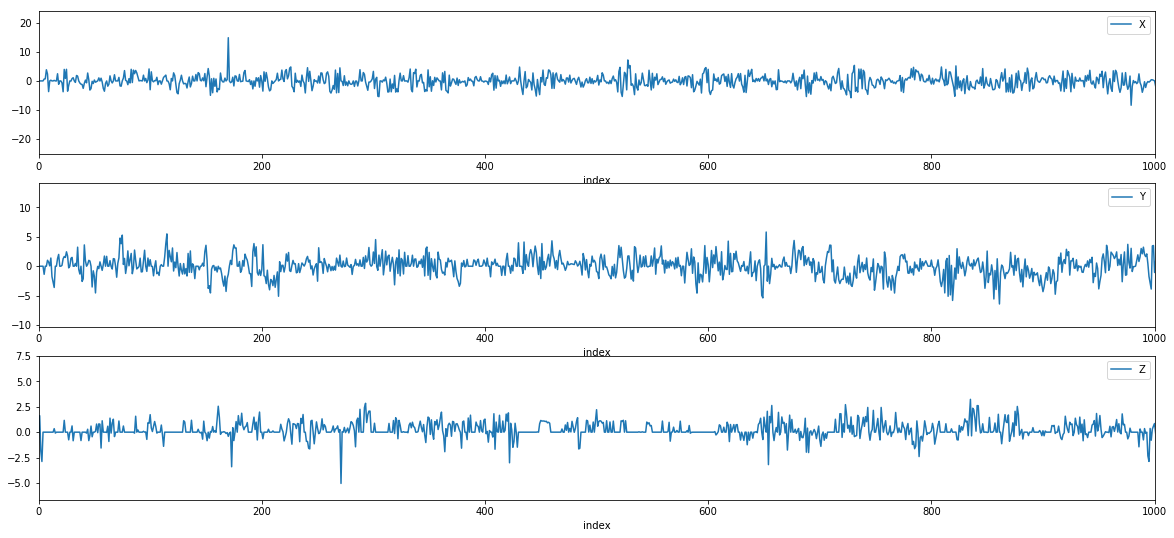

In [37]:
axis = ['X', 'Y', 'Z']
fig, axs = plt.subplots(3,1, figsize=(20, 9))
axs = axs.ravel()
for i in range(3):
    axs[i].plot(df[axis[i]], label=axis[i])
    axs[i].set_xlabel('index')
    axs[i].set_xlim(0, 1000)
    axs[i].legend()

## 相関見てみる

**pair plot**

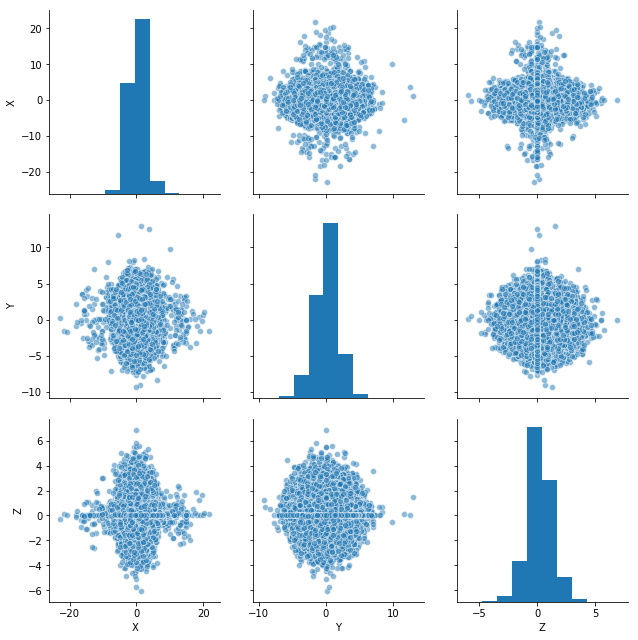

In [24]:
sns.pairplot(df, height=3, plot_kws=dict(alpha=0.5))

---> これは...ほとんど独立な分布ですね

**heat map**

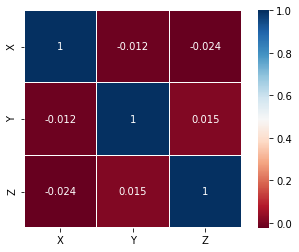

In [28]:
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

---> ほとんど相関なし